In [83]:
import matplotlib.pyplot as plt
import math

from sklearn import metrics

from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import make_classification

In [112]:
X, y = make_classification(n_samples=10000, 
                           n_features=25, 
                           n_redundant=10, 
                           n_repeated=5,
                           weights=[0.2,0.8],
                           class_sep=0.2, 
                           flip_y=0.1)

In [113]:
y.mean()

0.76829999999999998

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [123]:
param_grid = [
    {
        'pca__n_components':[5,10,20],
        'clf__n_estimators':[5,20,50,100,200],
        'clf__max_depth':[1,2,3,4]
    }
]

In [124]:
print('total number of configurations: ',len(ParameterGrid(param_grid)))

total number of configurations:  60


In [125]:
pipeline = Pipeline([
    ('pca',PCA()),
    ('clf',GradientBoostingClassifier())
])

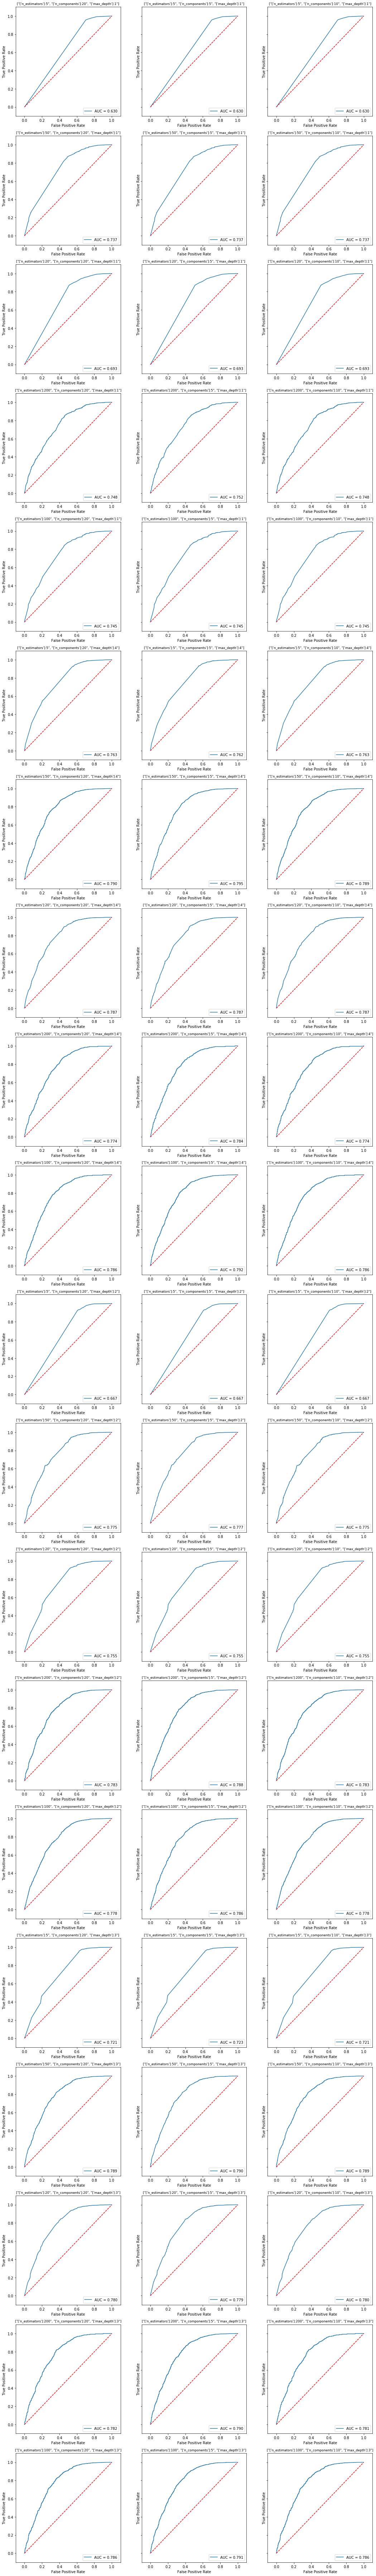

In [126]:
num_cols = 3
num_rows = math.ceil(len(ParameterGrid(param_grid)) / num_cols)

plt.clf()
fig,axes = plt.subplots(num_rows,num_cols,sharey=True)
fig.set_size_inches(num_cols*5,num_rows*5)

for i,g in enumerate(ParameterGrid(param_grid)):
    
    pipeline.set_params(**g)
    pipeline.fit(X_train,y_train)
    
    y_preds = pipeline.predict_proba(X_test)

    # take the second column because the classifier outputs scores for
    # the 0 class as well
    preds = y_preds[:,1]

    # fpr means false-positive-rate
    # tpr means true-positive-rate
    fpr, tpr, _ = metrics.roc_curve(y_test, preds)

    auc_score = metrics.auc(fpr, tpr)
       
    ax = axes[i // num_cols, i % num_cols]
    
    # don't print the whole name or it won't fit
    ax.set_title(str([r"{}:{}".format(k.split('__')[1:],v) for k,v in g.items()]),fontsize=9)
    ax.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc_score))
    ax.legend(loc='lower right')

    # it's helpful to add a diagonal to indicate where chance 
    # scores lie (i.e. just flipping a coin)
    ax.plot([0,1],[0,1],'r--')

    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.1,1.1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

plt.gcf().tight_layout()
plt.show()